In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
city_substation = gpd.read_file("city_sub_stations_0429.GPKG")
metro_lines = gpd.read_file("Metro lines.GPKG")

DriverError: city_sub_stations_0429.GPKG: No such file or directory

In [3]:
metro_lines

,osm_id,id,from_id,to_id,distance,time,weights,geometry
0,166187911,358,634,317,107.447350,0.004298,107,"LINESTRING (4.98231 52.29634, 4.98389 52.29634)"
1,166187911,359,318,634,58.234342,0.002329,58,"LINESTRING (4.98389 52.29634, 4.98474 52.29634)"
2,166187913,361,321,318,21.221392,0.000849,21,"LINESTRING (4.98474 52.29634, 4.98505 52.29634)"
3,166187917,366,654,321,140.268473,0.005611,140,"LINESTRING (4.98505 52.29634, 4.98563 52.29635..."
4,166187917,367,328,654,140.227871,0.005609,140,"LINESTRING (4.98711 52.29638, 4.98733 52.29639..."
...,...,...,...,...,...,...,...,...
523,166187928,379,335,341,43.280341,0.001731,43,"LINESTRING (4.98168 52.29630, 4.98231 52.29630)"
524,181905505,498,145,425,88.355775,0.003534,88,"LINESTRING (4.97441 52.29560, 4.97566 52.29581)"
525,181908686,501,426,427,17.734050,0.000709,17,"LINESTRING (4.97630 52.29592, 4.97655 52.29596)"
526,181908691,502,427,326,60.087213,0.002403,60,"LINESTRING (4.97655 52.29596, 4.97696 52.29603..."


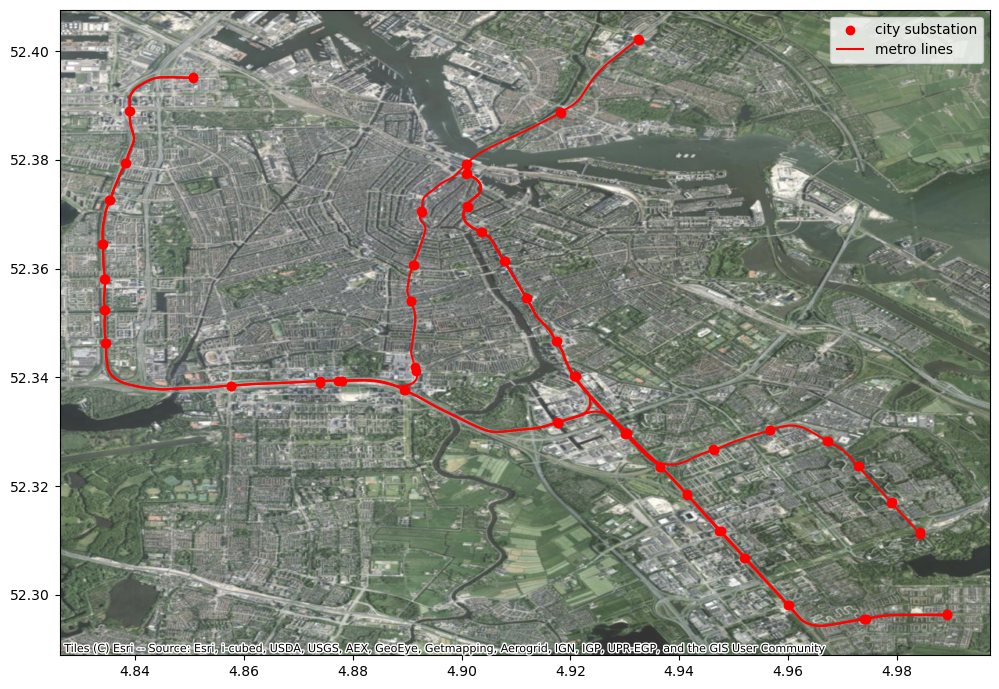

In [9]:
fig, ax = plt.subplots(figsize = [12,10])
city_substation.plot(ax =ax, color = 'red',label='city substation')
metro_lines.plot(ax =ax, color = 'red',label='metro lines')
ax.legend(loc='upper right', fontsize=10)
ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery, alpha=0.8)

plt.savefig('foo.png')

plt.show()

In [5]:

import osmium
import shapely.wkb
import pandas as pd
import geopandas as gpd

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z

class AdminAreaHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)

        self.areas = []
        self.wkbfab = osmium.geom.WKBFactory()

    def area(self, a):            
        if  "admin_level" in a.tags:

            wkbshape = self.wkbfab.create_multipolygon(a)
            shapely_obj = shapely.wkb.loads(wkbshape, hex=True)
            
            area = { "id": a.id, "geo": shapely_obj }
            area = merge_two_dicts(area, a.tags)
            
            self.areas.append(area)
        
handler = AdminAreaHandler()

# path to file to local drive
# download from https://download.geofabrik.de/index.html
osm_file = 'noord_holland-latest.osm.pbf'

# start data file processing
handler.apply_file(osm_file, locations=True, idx='flex_mem')

df = pd.DataFrame(handler.areas)
gdf = gpd.GeoDataFrame(df, geometry="geo")
gdf

,id,geo,admin_level,authoritative,boundary,name,ref:woonplaatscode,source,start_date,wikidata,...,ref:provinciecode,loc_name,name:azb,name:grc,name:hsb,name:sr,name:syc,name:hi,name:ko,name:pt
0,289471,"MULTIPOLYGON (((4.67460 52.77692, 4.68465 52.7...",10,yes,administrative,Sint Maartensvlotbrug,2760,BAG,2009-06-16 00:00:00.01,Q2952601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,316121,"MULTIPOLYGON (((4.67320 52.39369, 4.67366 52.3...",10,yes,administrative,Haarlemmerliede,2641,BAG,2008-09-02 00:00:00,Q3125257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,317509,"MULTIPOLYGON (((5.14786 52.66411, 5.14879 52.6...",10,yes,administrative,Hem,1507,BAG,2009-04-15 00:00:05,Q3130000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,317505,"MULTIPOLYGON (((5.18498 52.63608, 5.18511 52.6...",10,yes,administrative,Oosterleek,1510,BAG,2009-04-15 00:00:04,Q2036908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,317507,"MULTIPOLYGON (((5.12071 52.65139, 5.12113 52.6...",10,yes,administrative,Wijdenes,1514,BAG,2009-04-15 00:00:05,Q1854763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,3767235,"MULTIPOLYGON (((4.60193 52.29886, 4.60197 52.2...",10,yes,administrative,Zwaanshoek,1611,BAG,2010-02-09 00:00:00,Q2300048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,3767209,"MULTIPOLYGON (((4.62010 52.33372, 4.62053 52.3...",10,yes,administrative,Cruquius,1612,BAG,2010-02-09 00:00:00,Q601276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,3767219,"MULTIPOLYGON (((4.57734 52.26621, 4.57850 52.2...",10,yes,administrative,Nieuw-Vennep,1602,BAG,2023-04-20 00:00:00,Q545457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,3767211,"MULTIPOLYGON (((4.61861 52.30142, 4.61864 52.3...",10,yes,administrative,Hoofddorp,1597,BAG,2023-04-20 00:00:00,Q995911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

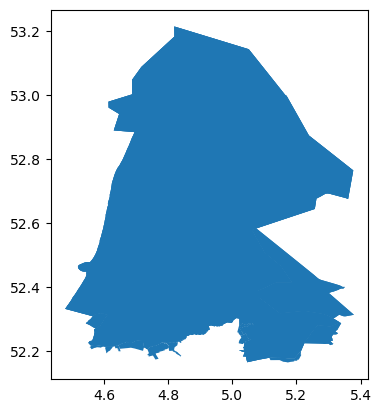

In [6]:
gdf.plot()

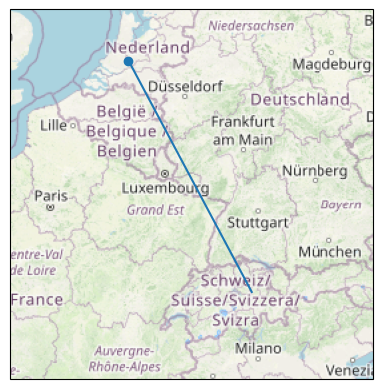

In [11]:
import matplotlib.pyplot as pl
import numpy as np

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

request = cimgt.OSM()

# Bounds: (lon_min, lon_max, lat_min, lat_max):
extent = [1, 13, 45, 53]

ax = pl.axes(projection=request.crs)
ax.set_extent(extent)
ax.add_image(request, 5)    # 5 = zoom level

# Just some random points/lines:
pl.scatter(4.92, 51.97, transform=ccrs.PlateCarree())
pl.plot([4.92, 9], [51.97, 47], transform=ccrs.PlateCarree())

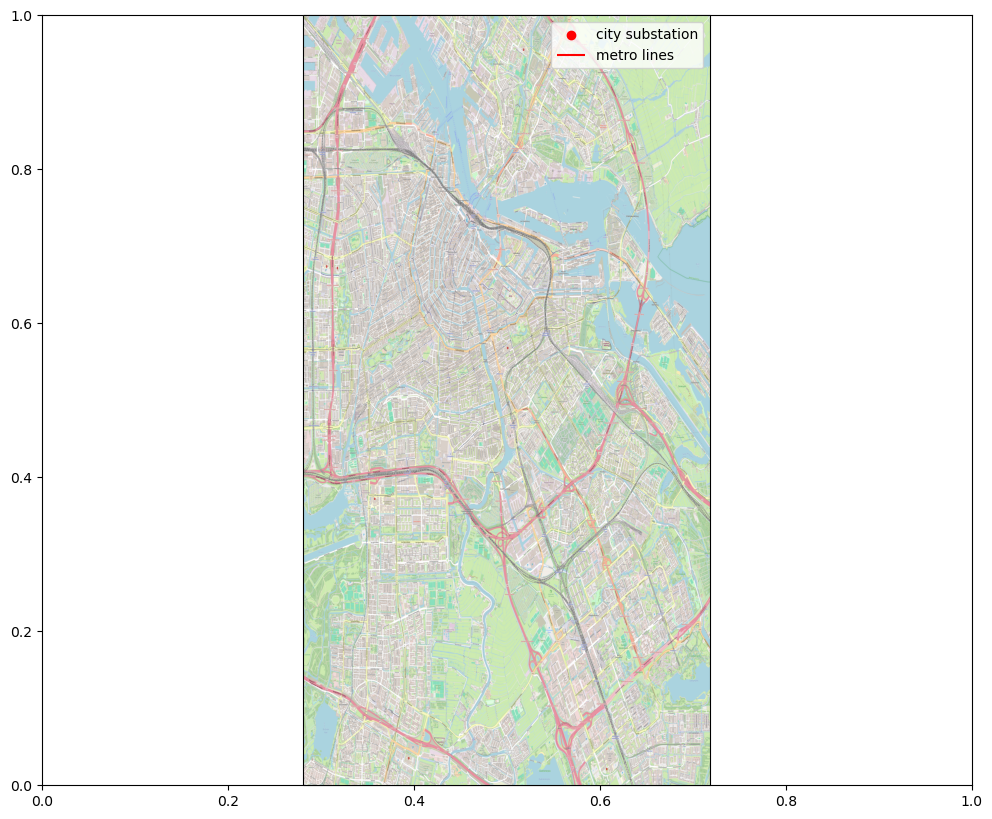

In [8]:
fig, ax = plt.subplots(figsize = [12,10])
# ctx.add_basemap(ax=ax, crs=metro_lines.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

request = cimgt.OSM()
extent = [4.83, 5.00, 52.29, 52.41]

ax = pl.axes(projection=request.crs)
ax.set_extent(extent)
ax.add_image(request, 15)    # 5 = zoom level

city_substation.plot(ax =ax, color = 'red',label='city substation')
metro_lines.plot(ax =ax, color = 'red',label='metro lines')
ax.legend(loc='upper right', fontsize=10)

plt.show()